In [1]:
# Import libraries dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
import seaborn as sns

%matplotlib inline  

# Print libraries version
lib = {'Pandas':pd, 'Numpy':np, 'Seaborn':sns}
for k, v in lib.items():
    ver = v.__version__
    print('{} Version {}'.format(k, ver))

Pandas Version 0.24.2
Numpy Version 1.15.1
Seaborn Version 0.9.0


In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 20000)
pd.set_option('display.float_format', '${:,.2f}'.format)

In [3]:
categorical = ['OFFENCE_FINYEAR','OFFENCE_DESC', 'CAMERA_IND', 'CAMERA_TYPE', 'LOCATION_CODE', 'LOCATION_DETAILS', 'SCHOOL_ZONE_IND', 'SPEED_BAND', 'SPEED_IND', 
        'POINT_TO_POINT_IND', 'RED_LIGHT_CAMERA_IND', 'SPEED_CAMERA_IND', 'SEATBELT_IND', 'MOBILE_PHONE_IND', 'PARKING_IND', 
        'CINS_IND', 'FOOD_IND', 'BICYCLE_TOY_ETC_IND']

In [4]:
cat_dict = {}
for i in categorical:
    cat_dict[i] = 'category'

In [7]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y/%m/%d')

In [8]:
# Set path to data file
url = '..\Data_sets\Intermediate_data\pol_data_clean.csv'

In [9]:
# Read the data from csv file
df = pd.read_csv(url, float_precision=2, dtype=cat_dict, parse_dates=['OFFENCE_MONTH'], index_col=['OFFENCE_MONTH'], dayfirst=True)

In [10]:
# Get info from the data frame and, memory usage
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 285444 entries, 2015-07-01 to 2015-04-01
Data columns (total 22 columns):
OFFENCE_FINYEAR         285444 non-null category
OFFENCE_CODE            285444 non-null int64
OFFENCE_DESC            285444 non-null category
FACE_VALUE              285444 non-null float64
CAMERA_IND              285444 non-null category
CAMERA_TYPE             285444 non-null category
LOCATION_CODE           285444 non-null category
LOCATION_DETAILS        285444 non-null category
SCHOOL_ZONE_IND         285444 non-null category
SPEED_BAND              285444 non-null category
SPEED_IND               285444 non-null category
POINT_TO_POINT_IND      285444 non-null category
RED_LIGHT_CAMERA_IND    285444 non-null category
SPEED_CAMERA_IND        285444 non-null category
SEATBELT_IND            285444 non-null category
MOBILE_PHONE_IND        285444 non-null category
PARKING_IND             285444 non-null category
CINS_IND                285444 non-null cate

In [11]:
# Look at the data header for an initial idea of the data
df.head(3)

,OFFENCE_FINYEAR,OFFENCE_CODE,OFFENCE_DESC,FACE_VALUE,CAMERA_IND,CAMERA_TYPE,LOCATION_CODE,LOCATION_DETAILS,SCHOOL_ZONE_IND,SPEED_BAND,SPEED_IND,POINT_TO_POINT_IND,RED_LIGHT_CAMERA_IND,SPEED_CAMERA_IND,SEATBELT_IND,MOBILE_PHONE_IND,PARKING_IND,CINS_IND,FOOD_IND,BICYCLE_TOY_ETC_IND,TOTAL_NUMBER,TOTAL_VALUE
OFFENCE_MONTH,,,,,,,,,,,,,,,,,,,,,,
2015-07-01,2015-2016,82616,Park continuously for longer than permitted,$106.00,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,23009,"$2,438,954.00"
2013-01-01,2012-2013,24703,Exceed speed limit over 10km/h - Camera Detected,"$1,215.00",Y,Mobile Digital Speed Camera,28330.0,WOODWARD STREET ORANGE SOUTHBOUND,N,EXCEED SPEED OVER 10KM/H,Y,N,N,Y,N,N,N,N,N,N,1,"$1,215.00"
2013-01-01,2012-2013,64007,Proceed through red traffic arrow,$397.00,N,N,N,N,N,NOT STOP AT RED LIGHT,N,N,N,N,N,N,N,N,N,N,94,"$37,318.00"


In [35]:
monthly_data_value = df.groupby('OFFENCE_MONTH').agg({'TOTAL_VALUE': 'count', }).reset_index()

In [15]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [22]:
# Format for plotting
sns.set(style="white")

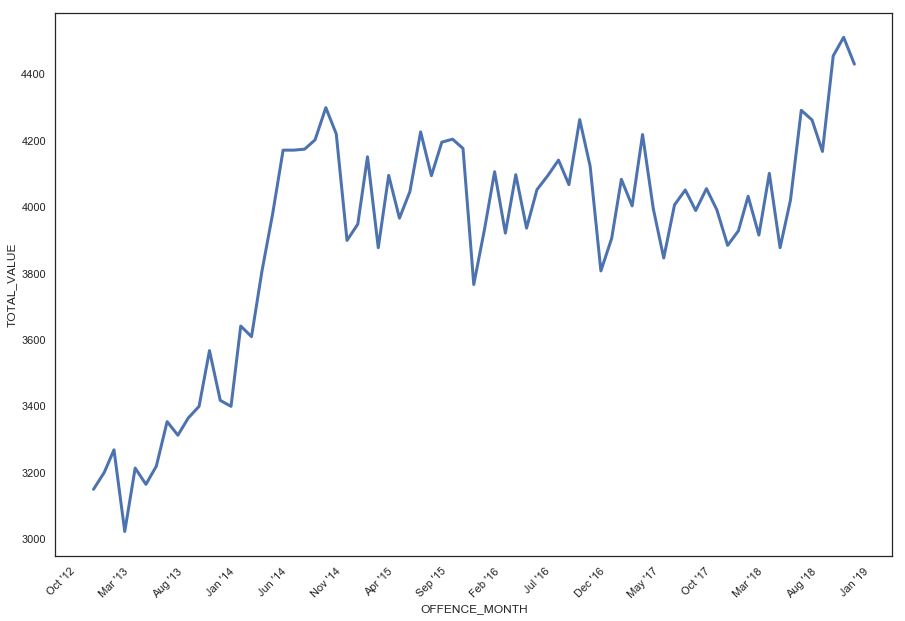

In [36]:
# Plotting a seaborn lineplot

f, ax = plt.subplots(figsize=(15,10))

ax = sns.lineplot(x='OFFENCE_MONTH', y='TOTAL_VALUE', data=monthly_data_value, linewidth=3)
months = MonthLocator(range(1, 13), bymonthday=1, interval=5)
monthsFmt = DateFormatter("%b '%y")
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax = plt.xticks(rotation=45)